In [ ]:
!pip install tensorflow pandas scikit-learn matplotlib

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/amazon.csv', encoding='latin1')

In [ ]:
df.head()

,year,state,month,number,Month
date,,,,,
1998-01-01,1998,Acre,January,0.0,January
1999-01-01,1999,Acre,January,0.0,January
2000-01-01,2000,Acre,January,0.0,January
2001-01-01,2001,Acre,January,0.0,January
2002-01-01,2002,Acre,January,0.0,January


In [ ]:
month_map = {
    'Janeiro': 'January', 'Fevereiro': 'February', 'Março': 'March',
    'Abril': 'April', 'Maio': 'May', 'Junho': 'June',
    'Julho': 'July', 'Agosto': 'August', 'Setembro': 'September',
    'Outubro': 'October', 'Novembro': 'November', 'Dezembro': 'December'
}

df['month'] = df['month'].map(month_map)
df['date'] = pd.to_datetime(df['month'] + ' ' + df['year'].astype(str), format='%B %Y')
df.set_index('date', inplace=True)

In [ ]:
df_grouped = df.groupby('date')['number'].sum().to_frame()

In [ ]:
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(df_grouped)

In [ ]:
def create_dataset(series, window_size=3):
    X, y = [], []
    for i in range(len(series) - window_size):
        X.append(series[i:i+window_size].flatten())
        y.append(series[i+window_size])
    return np.array(X), np.array(y)

X, y = create_dataset(data_scaled, window_size=3)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [ ]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=50, batch_size=4, verbose=1)

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0833
Epoch 2/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0369
Epoch 3/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0397
Epoch 4/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0347
Epoch 5/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0296
Epoch 6/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0298
Epoch 7/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0348
Epoch 8/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0268
Epoch 9/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0302
Epoch 10/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0287
Epoch 11/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0274
Epoch 12/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0259
Epoch 13/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0240
Epoch 14/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0306
Epoch 15/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0265
Epoch 16/50
47/47 ━━━━━━━━━━━━

In [ ]:
y_pred = model.predict(X_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


In [ ]:
y_pred_inv = scaler.inverse_transform(y_pred)
y_test_inv = scaler.inverse_transform(y_test)

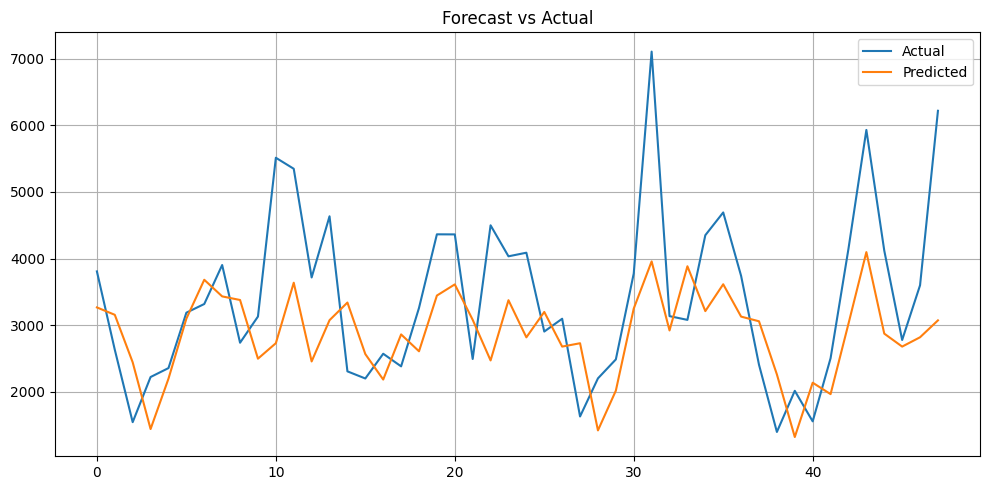

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(y_test_inv, label='Actual')
plt.plot(y_pred_inv, label='Predicted')
plt.legend()
plt.title("Forecast vs Actual")
plt.grid(True)
plt.tight_layout()
plt.show()